In [1]:
# EXAMPLE: classifying SPAM with fLing

import matplotlib as mpl
from imp import reload
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk,re,pprint
import sys,glob,os
import operator, string, argparse, math, random, statistics
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
from fling import utilities as ut
from fling import tfidfModule as tfm

#load and preProcess (tokenize) the data, you can use other tokenizers as well
os.chdir("/Users/arnabborah/Documents/repositories/fling/")
spamtm = tfm.dataProcessor("datasets/spamTextMessages.csv",None)
spamtm.dataInitial

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# creating a flingTFIDF to compute TF-IDF and add it as a new column (pd.dataframe) to data
ftf = tfm.flingTFIDF(spamtm.dataInitial,'Message')
ftf.smartTokenizeColumn()
ftf.getTF()
ftf.computeIDFmatrix()
ftf.getTFIDF()

#do the next line only if you are computing distances on tfIDF dict only
ftf.createDistanceMetadata()

[ ================================================== ] 100.00%
Adding term frequency column based on stopsRemoved
[ ================================================== ] 100.00%
Computing list of words for IDF...

Created list of terms for IDF matrix with 8780  terms.

Computing global IDF matrix...

[ ================================================== ] 100.00%
Computing and adding TF-IDF column based on stopsRemoved
[ ================================================== ] 100.00%

In [4]:
import gensim
from fling import vectorize as vect

# training and adding doc2vec vectors based on column 'Messages'.
# gensim is a requirement to train doc2vec vectors 
vecc = vect.vectorize(ftf.data,'Message')
trained_doc2vec_model = vecc.trainDocVectors()
vecc.addDocVectors()
vecc.data

5572 documents added!


,Category,Message,stopsRemoved,tfMatrix,sumTFIDF,doc2vec
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,word tf tf-idf 0 go 1 ...,38.281443,"[0.015742207, 0.0031893118, 0.010138756, -0.08..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,word tf tf-idf 0 ok 1 1.31950...,12.583182,"[-0.014953367, 0.030154036, 0.017708715, -0.10..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st...,word tf tf-idf 0 entry ...,49.524838,"[0.008385706, 0.004221165, -2.3364251e-05, -0...."
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,word tf tf-idf 0 u 2 1.669...,16.431526,"[0.029679298, 0.06244122, -0.008049136, -0.119..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,word tf tf-idf 0 nah 1 2.70461...,16.678825,"[0.004876227, -0.008055425, 0.0023417333, 0.00..."
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u â£ pound prize cla...,word tf tf-idf 0 ...,29.685673,"[0.043106798, 0.06623637, -0.010588597, -0.185..."
5568,ham,Will Ã¼ b going to esplanade fr home?,ã¼ b going esplanade fr home,word tf tf-idf 0 ã¼ 1 1...,12.328684,"[0.016016621, -0.01830655, 0.016508967, -0.105..."
5569,ham,"Pity, * was in mood for that. So...any other s...",pity * mood soany suggestions,word tf tf-idf 0 pity ...,15.080331,"[-0.18763976, 0.03453686, -0.027078941, -0.055..."
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like i'd interested buying ...,word tf tf-idf 0 guy ...,32.770129,"[0.009096158, -0.0057535497, 0.004273705, -0.0..."



Working on pretrained word embeddings!

Loading Glove Model

400000  words loaded!

GloVe Vectors Loaded!

[ ================================================== ] 100.00%
Computing column: vec_tfidf-glove
[ ==                                                 ] 5.81%

/Users/arnabborah/Documents/repositories/fling/fling/flingPretrained.py:237: RuntimeWarning: Mean of empty slice
  return(np.nanmean(docVecList,axis=0))


[ =========================================          ] 83.44%%

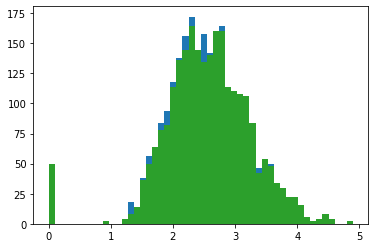

In [5]:
from fling import flingPretrained as fpt

# creating a flingPretrained
# dataProcessed = pd.read_pickle('datasets/data_tfidf_processed.pkl')
fdb = fpt.flingPretrained(vecc.data)
#adding pretrained glove vectors 
fdb.loadPretrainedWordVectors('glove')
fdb.addDocumentGloveVectors()

# adding combo vectors with tfidf and (glove + doc2vec) for inter sentence semantic information addition
fdb.tfidf2vec('tf-idf','glove')
# fdb.tfidf2vec('tf-idf','doc2vec')
fdb.splitTestTrain()
fdb.dataTrain

In [6]:
# train group characteristics on column 'category' 
fdb.createGroupedCharacteristics('Category')
for key in fdb.groupedCharacteristic.keys():
    print('Characteristic of',key,'\n',fdb.groupedCharacteristic[key])   


Computing groupCharacteristics for, Category
Characteristic of glove 
 None
Characteristic of vec_tfidf-doc2vec 
 None
Characteristic of vec_tfidf-glove 
                                             vec_tfidf-glove
Category                                                   
ham       [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
spam      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
Characteristic of doc2vec 
                                                     doc2vec
Category                                                   
ham       [-0.0008339239, 0.008468696, 0.0014372141, -0....
spam      [0.00509379, 0.008787291, -0.0049210927, -0.05...
Characteristic of glove-vector 
                                                glove-vector
Category                                                   
ham       [0.08621057522946847, 0.16108873455431685, 0.1...
spam      [0.038020029286601906, 0.25794960063990663, 0....
Characteristic of glove-tfIDF 
                                

In [7]:
# predict vector based Category for each type of vector added
fdb.addVectorComputedGroup('glove-vector','cGroup_glove')
fdb.addVectorComputedGroup('doc2vec','cGroup_doc2vec')
fdb.addVectorComputedGroup('glove-tfIDF','cGroup_gloveWt_tfidf')
fdb.addVectorComputedGroup('vec_tfidf-glove','cGroup_tfidf-glove')

/Users/arnabborah/Documents/repositories/fling/fling/flingPretrained.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataTest[groupName] = computedGroups


In [8]:
#fdb.addVectorComputedGroup('vec_tfidf-doc2vec','cGroup_tfidf-doc2vec')
fdb.getAccuracy('Category','cGroup_glove')
fdb.getAccuracy('Category','cGroup_doc2vec')
fdb.getAccuracy('Category','cGroup_gloveWt_tfidf')
fdb.getAccuracy('Category','cGroup_tfidf-glove')

Accuracy of cGroup_glove 79.84449760765551 %
Accuracy of cGroup_doc2vec 78.88755980861244 %
Accuracy of cGroup_gloveWt_tfidf 79.90430622009569 %
Accuracy of cGroup_tfidf-glove 0.0 %
